In [65]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
from tensorflow.keras.models import Sequential

In [50]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [51]:
trainpath="C:\\Users\\talha\\OneDrive\\Desktop\\xyz\\chest_xray\\train"

In [52]:
testpath="C:\\Users\\talha\\OneDrive\\Desktop\\xyz\\chest_xray\\test"

In [53]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
training_set = train_datagen.flow_from_directory("C:\\Users\\talha\\OneDrive\\Desktop\\xyz\\chest_xray\\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [55]:
test_set = test_datagen.flow_from_directory("C:\\Users\\talha\\OneDrive\\Desktop\\xyz\\chest_xray\\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [56]:
image_shape = (224,224,3)

In [57]:
from tensorflow.keras.models import Sequential

In [58]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [59]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation = 'relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation = 'relu'))     
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation = 'relu'))     
model.add(MaxPooling2D(pool_size=(2,2)))
          
          
model.add(Flatten())
          
model.add(Dense(128))
model.add(Activation('relu'))
          
          
model.add(Dropout(0.5))
          
          
model.add(Dense(1))
model.add(Activation('sigmoid'))
          
          
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
          


In [60]:
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
early_stop = EarlyStopping(patience=4)

In [62]:
batch_size = 32

In [63]:
result = model.fit(training_set, epochs = 10, validation_data = test_set, callbacks=[early_stop])

Epoch 1/10
163/163 [==============================] - 400s 2s/step - loss: 0.3978 - accuracy: 0.8234 - val_loss: 0.4684 - val_accuracy: 0.8013
Epoch 2/10
163/163 [==============================] - 353s 2s/step - loss: 0.2588 - accuracy: 0.8942 - val_loss: 0.6798 - val_accuracy: 0.7564
Epoch 3/10
163/163 [==============================] - 356s 2s/step - loss: 0.2329 - accuracy: 0.9030 - val_loss: 0.3297 - val_accuracy: 0.8494
Epoch 4/10
163/163 [==============================] - 381s 2s/step - loss: 0.2095 - accuracy: 0.9151 - val_loss: 0.2846 - val_accuracy: 0.8926
Epoch 5/10
163/163 [==============================] - 347s 2s/step - loss: 0.1796 - accuracy: 0.9296 - val_loss: 0.4399 - val_accuracy: 0.8269
Epoch 6/10
163/163 [==============================] - 345s 2s/step - loss: 0.1599 - accuracy: 0.9377 - val_loss: 0.2749 - val_accuracy: 0.9054
Epoch 7/10
163/163 [==============================] - 342s 2s/step - loss: 0.1532 - accuracy: 0.9440 - val_loss: 0.3603 - val_accuracy: 0.8958

<AxesSubplot:>

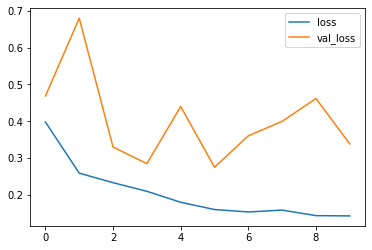

In [66]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [68]:
model.evaluate_generator(test_set)
model.metrics_names
prediction = model.predict_generator(test_set)

C:\Users\talha\AppData\Local\Temp\ipykernel_16644\1699418866.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_set)
C:\Users\talha\AppData\Local\Temp\ipykernel_16644\1699418866.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prediction = model.predict_generator(test_set)


In [69]:
print(classification_report(test_set.classes,np.argmax(prediction,axis=1)))